<a href="https://colab.research.google.com/github/CLAIR-LAB-TECHNION/energy-net/blob/main/Running_the_day_ahead_market_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Managing the Day-Ahead Market

electricity-market.svg

The objective of this tutorial is to demonstrate the process of running the day-ahead market. The setting we consider here includes two types of agents: the ISO, which sets the electricity production plan and the sell and feed-in tariffs, and the PCS units (production, consumption, and storage units) that participate in the market.

❗ Importantly, the PCSunit is a general entity that may be associated with various production, consumption, and storage functions (or only one of them). This means that it can be instantiated in many ways to represent, for example, a battery (only storage), a household (with all three capabilities), or a city (with any relevant combination of the three). This generalization is a software engineering concept that allows us to create code that is varsetile and adaptable.

## Decision-Operational Cycle:


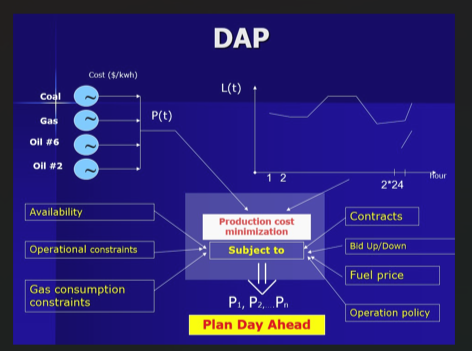

As a first step, we deal with the day-ahead market under the assumption that all the information is known and all the decisions are made at time 0. We will later relax these assumptions.  


We are considering a 24- hour decision horizon of 48 half-hour intervales.

The input includes:
- the predicted demand $\hat{D}$ for each timestep (interval) in the decision horizon
- the production capabilities and costs of the units controlled by the ISO for each timestep (and its controlled units)
- the production, storage, and transmission bounds on each PCSUnit






The iterative process includes at every iteration (every 24-hours at timestep 0):
- the ISO sets the Day-Ahead Program (DAP) that sets the amount of electricity to produce at each timestep
- the ISO sets the sell and feed-in tariffs per timestep for the entire decision horizon
- the PCSUnits see the prices and decide how much power to store, sell/buy, and consume at every timestep. In practice, all these are often reflected by one decision variable that considers storage.

This process continues until convergence (and before timestep 1)

## Assumptions (for now):

*  All decisions are made at time 0. This means that the policies are fixed at time 0 and while an  agent can choose its current action based on the real-time state at any timestep t, the policy (mapping from states of actions) is fixed at timestep 0, i.e., there is no real-time update of policies
* As a first step, we assume that the predicted and realized demands are equal
* The DAP process is abstracted, i.e., we do not deal with how the generation is distributed among controlled production agents. We only deal with the high-level decision of how much to generate and the pricing of energy
* For now, the demand is modeled as a sinusoidal for which the user sets the parameters. Later on, we will integrate more elaborate ways to define demand
* Similarly, the production costs are fixed (per unit and per timestep). This too will be extended to support elaborate functions   



#The `energy-net` Environment

COMPLETE

##Step 1: Setting Up the `energy-net` Environment

First, we setup the` energynet ` environment by installing it. No need to do anything beyond running the cell.

In [ ]:
!git clone https://github.com/CLAIR-LAB-TECHNION/energy-net.git

%cd energy-net
!pip install -e .

Cloning into 'energy-net'...
remote: Enumerating objects: 4270, done.
remote: Counting objects: 100% (484/484), done.
remote: Compressing objects: 100% (290/290), done.


In [ ]:
## add to requirements later !
!pip install ruamel.yaml


Note that the text box appears below the cell

TODO COMPLETE discussion on the limitation of changing the paramers. It is possible but the policy is not tailored.

After setting up the basic parameters, we now load the pre-trained agents that were trained using the different ISO models.

We have pretrained 3 pcsunit agents:


1.   INTERVALS: two price levels in response to demand level
2.   QUADRATIC: quadratic (sublinear) prices for purchasing (selling) power from (to) the ISO
3.  ONLINE: currently not active: will be imeplemtned later on
4. RANDOM: a random



## Select Pricing Mechanism


**bold text**## Step 2: loading the PCS units (and their associated marktet players) and setting their paramaters
[link text](https://)#TODO: load pcs players - add up after training on newtown


In [ ]:
# Block 1: Select number of PCS agents
print("\n# Select number of PCS agents")
print("Choose the number of PCS agents to use in simulation:")

while True:
    num_pcs_agents = input("Enter number of PCS agents (1-10): ").strip()
    try:
        num_pcs_agents = int(num_pcs_agents)
        if 1 <= num_pcs_agents <= 10:
            break
        print("Please enter a number between 1 and 10")
    except ValueError:
        print("Please enter a valid number")

print(f"\nSelected {num_pcs_agents} PCS agents")

In [ ]:
print("Select a pricing mechanism (this will be used as a constant parameter):")
print("1: INTERVALS   (two price levels in response to demand level)")
print("2: QUADRATIC   (quadratic/sublinear prices for power purchase/sale)")
print("3: ONLINE      (currently inactive, to be implemented)")
print("4: RANDOM      (random pricing)")

pricing_choice = input("Enter 1, 2, 3, or 4: ").strip()

if pricing_choice == "1":
    pricing_mechanism = "INTERVALS"
    pcs_agent_config_path = "configs/pcs_agent_intervals.json"  # example path
elif pricing_choice == "2":
    pricing_mechanism = "QUADRATIC"
    pcs_agent_config_path = "configs/pcs_agent_quadratic.json"
elif pricing_choice == "3":
    pricing_mechanism = "ONLINE"
    pcs_agent_config_path = "configs/pcs_agent_online.json"
elif pricing_choice == "4":
    pricing_mechanism = "RANDOM"
    pcs_agent_config_path = "configs/pcs_agent_random.json"
else:
    print("Invalid input; defaulting to QUADRATIC")
    pricing_mechanism = "QUADRATIC"
    pcs_agent_config_path = "configs/pcs_agent_quadratic.json"

# Save the selected pricing mechanism in a global variable
print(f"Selected pricing mechanism: {pricing_mechanism}")

# Load the corresponding PCS agent configuration
def load_pcs_agent(config_path):
    # Replace this placeholder with our actual PCS agent loading function
    return f"Loaded PCS agent from {config_path}"

pcs_agent = load_pcs_agent(pcs_agent_config_path)
print("PCS Agent loaded:", pcs_agent)


In [ ]:
print("\n# Select Demand Pattern")
print("Choose a demand pattern for the simulation:")
print("1: SINUSOIDAL  (smooth daily cycle with one peak)")
print("2: CONSTANT    (fixed demand level)")
print("3: DOUBLE_PEAK (morning and evening peaks)")

while True:
    demand_choice = input("Enter 1, 2, or 3: ").strip()

    if demand_choice == "1":
        demand_pattern = "SINUSOIDAL"
        break
    elif demand_choice == "2":
        demand_pattern = "CONSTANT"
        break
    elif demand_choice == "3":
        demand_pattern = "DOUBLE_PEAK"
        break
    else:
        print("Invalid input; please enter 1, 2, or 3")

print(f"\nSelected demand pattern: {demand_pattern}")

In [ ]:
# Block: Select Cost Type

print("Select cost type:")
print("1: CONSTANT")
print("2: FUNCTION")
cost_type_choice = input("Enter 1 or 2: ").strip()

if cost_type_choice == "1":
    cost_type_str = "CONSTANT"
elif cost_type_choice == "2":
    cost_type_str = "FUNCTION"
else:
    print("Invalid choice. Defaulting to CONSTANT.")
    cost_type_str = "CONSTANT"


## ISO Parameter Setup


In [ ]:
# Block 2: Set ISO Training Parameters

print("\n--- ISO Training Parameter Setup ---")
try:
    total_iterations = int(input("Enter total iterations (e.g., 10): ").strip())
except:
    total_iterations = 10

try:
    train_timesteps_per_iteration = int(input("Enter timesteps per iteration (e.g., 10000): ").strip())
except:
    train_timesteps_per_iteration = 10000

try:
    eval_episodes = int(input("Enter number of evaluation episodes (e.g., 5): ").strip())
except:
    eval_episodes = 5

# The pricing mechanism selected above will be used as a constant parameter for the ISO environment.
print(f"ISO Training will use the pricing mechanism: {pricing_mechanism}")

# Save ISO parameters to a dictionary for later use
iso_params = {
    "total_iterations": total_iterations,
    "train_timesteps_per_iteration": train_timesteps_per_iteration,
    "eval_episodes": eval_episodes,
    "pricing_mechanism": pricing_mechanism
}


## Update PCS Battery Parameters

In [ ]:
# Block 3: Configure PCS Agents Battery Parameters
from ruamel.yaml import YAML
import os

print("\n# Configure PCS Agents")
configs_path = os.path.join("configs", "pcs_configs.yaml")
yaml_obj = YAML()
yaml_obj.preserve_quotes = True

# Load or create config file
try:
    with open(configs_path, "r") as file:
        all_configs = yaml_obj.load(file)
except Exception as e:
    print(f"Creating new config file: {e}")
    all_configs = {}

# Configure each agent
editable_params = [
    "charge_efficiency",
    "charge_rate_max",
    "discharge_efficiency",
    "discharge_rate_max",
    "init",
    "max"
]

for agent_idx in range(num_pcs_agents):
    agent_key = f"pcs_{agent_idx + 1}"
    print(f"\nConfiguring {agent_key}:")

    # Create default config if doesn't exist
    if agent_key not in all_configs:
        all_configs[agent_key] = {
            "battery": {
                "dynamic_type": "model_based",
                "model_parameters": {
                    "charge_efficiency": 0.9,
                    "charge_rate_max": 9.0,
                    "discharge_efficiency": 0.9,
                    "discharge_rate_max": 9.0,
                    "init": 9.0,
                    "max": 99.0
                }
            }
        }

    # Show and edit battery parameters
    battery_params = all_configs[agent_key]["battery"]["model_parameters"]
    print("\nCurrent battery parameters:")
    for param in editable_params:
        print(f"{param}: {battery_params.get(param)}")

    # Ask to edit
    edit_choice = input(f"\nDo you want to edit battery parameters for {agent_key}? (yes/no): ").strip().lower()
    if edit_choice == "yes":
        for param in editable_params:
            current = battery_params[param]
            new_value = input(f"Enter new {param} (current={current}): ").strip()
            if new_value:  # Only update if user entered a value
                battery_params[param] = float(new_value)

In [ ]:
# Block: Add Fixed Parameters
for agent_key in all_configs:
    # Add fixed battery parameters
    battery_params = all_configs[agent_key]["battery"]["model_parameters"]
    battery_params.update({
        "lifetime_constant": 100.0,
        "min": 0.0,
        "model_type": "deterministic_battery"
    })

    # Add consumption unit with fixed parameters
    all_configs[agent_key]["consumption_unit"] = {
        "dynamic_type": "model_based",
        "model_type": "deterministic_consumption",
        "model_parameters": {
            "consumption_capacity": 0.0,
            "peak_consumption1": 0.0,
            "peak_consumption2": 0.0,
            "peak_time1": 0.4,
            "peak_time2": 0.7,
            "width1": 0.05,
            "width2": 0.1
        }
    }

    # Add production unit with fixed parameters
    all_configs[agent_key]["production_unit"] = {
        "dynamic_type": "model_based",
        "model_type": "deterministic_production",
        "model_parameters": {
            "peak_production": 0.0,
            "peak_time": 0.5,
            "production_capacity": 0.0,
            "width": 0.1
        }
    }

# Save complete configuration
try:
    with open(configs_path, "w") as file:
        yaml_obj.dump(all_configs, file)
    print("\nAll PCS configurations saved successfully.")
except Exception as e:
    print(f"Error saving configurations: {e}")

## Training agent

In [ ]:
# Block 4: Training

print("\nStarting training...")

from iso_game_main import train_and_evaluate_agent, PricingPolicy
from energy_net.dynamics.iso.demand_patterns import DemandPattern
import random
from energy_net.dynamics.iso.cost_types import CostType



# Map the selected pricing mechanism to the corresponding PricingPolicy Enum value:
if pricing_mechanism == "QUADRATIC":
    pricing_policy_enum = PricingPolicy.QUADRATIC
elif pricing_mechanism == "INTERVALS":
    pricing_policy_enum = PricingPolicy.INTERVALS
elif pricing_mechanism == "ONLINE":
    pricing_policy_enum = PricingPolicy.ONLINE
elif pricing_mechanism == "RANDOM":
    pricing_policy_enum = PricingPolicy.RANDOM
else:
    pricing_policy_enum = PricingPolicy.QUADRATIC

# Convert the selected demand pattern to enum
demand_pattern_enum = DemandPattern[demand_pattern]

cost_type_enum = CostType[cost_type_str]


seed = random.randint(0, 10000)

train_and_evaluate_agent(
    algo_type='PPO',
    num_pcs_agents=num_pcs_agents,
    cost_type=cost_type_enum,
    trained_pcs_model_path=pcs_agent,
    pricing_policy=pricing_policy_enum,
    demand_pattern=demand_pattern_enum,
    total_iterations=iso_params["total_iterations"],
    train_timesteps_per_iteration=iso_params["train_timesteps_per_iteration"],
    eval_episodes=iso_params["eval_episodes"],
    seed=seed
)

## Evaluation

In [ ]:
import subprocess
import os
from IPython.display import Image, display

print("----- Evaluation / Visualizations -----")

trained_model_path = "models/agent_iso/agent_iso_final.zip"           # Final ISO model path
normalizer_path = "models/agent_iso/agent_iso_normalizer.pkl"           # Normalizer path
trained_pcs_model_path = "None"


eval_episodes = iso_params.get("eval_episodes", 5)
user_input = input(f"Enter number of evaluation episodes (default {eval_episodes}): ").strip()
if user_input:
    try:
        eval_episodes = int(user_input)
    except Exception as e:
        print("Invalid input; using default value.")

print(f"Running evaluation using pricing mechanism: {pricing_mechanism}")
print(f"Evaluation parameters:")
print(f"  Normalizer: {normalizer_path}")
print(f"  Trained PCS model: {trained_pcs_model_path}")
print(f"  Evaluation episodes: {eval_episodes}")

command = [
    "python3", "eval_agent.py",

    "--trained_pcs_model_path", trained_pcs_model_path,
    "--normalizer_path", normalizer_path,
    "--pricing_policy", pricing_mechanism,
    "--demand_pattern", demand_pattern,
    "--cost_type", cost_type_str,
    "--trained_model_path", trained_model_path,
    "--eval_episodes", str(eval_episodes)
]



print("\nRunning evaluation with command:")
print(" ".join(command))
result = subprocess.run(command, capture_output=True, text=True)

print("\nEvaluation Output:")
print(result.stdout)
if result.stderr:
    print("Evaluation Errors:")
    print(result.stderr)


## Visualizations

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load runtime info (a list of episodes, each being a list of step dictionaries)
data_file = "runtime_info.pkl"
with open(data_file, "rb") as f:
    all_episodes_actions = pickle.load(f)

episode_number = random.randint(1, len(all_episodes_actions)) # maybe should change

if len(all_episodes_actions) < episode_number:
    print(f"Only {len(all_episodes_actions)} episodes available; cannot display episode {episode_number}.")
else:
    episode_data = all_episodes_actions[episode_number - 1]

    # Compute cost components as in your callbacks:
    dispatch_costs = [step.get('dispatch_cost', 0.0) for step in episode_data]
    pcs_costs = [
        step.get('net_exchange', 0.0) *
        (step.get('iso_sell_price', 0.0) if step.get('net_exchange', 0.0) > 0
         else step.get('iso_buy_price', 0.0))
        for step in episode_data
    ]
    reserve_costs = [step.get('reserve_cost', 0.0) for step in episode_data]

    total_dispatch = sum(dispatch_costs)
    total_pcs = sum(pcs_costs)
    total_reserve = sum(reserve_costs)

    # Create the final cost distribution figure (similar to Figure 3 in your callback)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.bar([0], [total_dispatch], color='lightblue', label='Dispatch Cost')
    ax.bar([0], [total_pcs], bottom=[total_dispatch], color='lightgreen', label='PCS Exchange Cost')
    ax.bar([0], [total_reserve], bottom=[total_dispatch + total_pcs], color='salmon', label='Reserve Cost')

    ax.set_ylabel('Total Cost ($)', fontsize=12)
    ax.set_title(f'Episode {episode_number} Final Cost Distribution', fontsize=14)
    ax.set_xticks([])
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

    plt.tight_layout()
    plt.show()


In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load runtime data from file (this file should have been created by your callback)
runtime_file = "runtime_info.pkl"
try:
    with open(runtime_file, "rb") as f:
        all_episodes_actions = pickle.load(f)
    print(f"Loaded runtime data with {len(all_episodes_actions)} episodes.")
except Exception as e:
    print("Error loading runtime data:", e)
    all_episodes_actions = []

# Define the episode number to plot (Episode 9)
episode_num = random.randint(1, len(all_episodes_actions))


if len(all_episodes_actions) < episode_num:
    print(f"Only {len(all_episodes_actions)} episodes available; cannot plot episode {episode_num}.")
else:
    episode_data = all_episodes_actions[episode_num - 1]

    # Extract data from the episode
    steps = [step.get('step', 0) for step in episode_data]
    dispatch = [step.get('dispatch', 0.0) for step in episode_data]
    predicted_demand = [step.get('predicted_demand', 0.0) for step in episode_data]
    realized_demand = [step.get('realized_demand', 0.0) for step in episode_data]
    net_exchange = [step.get('net_exchange', 0.0) for step in episode_data]

    # Compute total (net) demand: realized_demand + net_exchange
    net_demand = [r + n for r, n in zip(realized_demand, net_exchange)]

    # Create the plot replicating the upper graph ("Energy Flows")
    plt.figure(figsize=(15, 6))
    plt.bar(steps, dispatch, width=0.8, color='lightblue', label='Dispatch')
    plt.plot(steps, predicted_demand, 'k--', linewidth=2, label='Predicted Demand')
    plt.plot(steps, realized_demand, 'b-', linewidth=2, label='Non Strategic Demand')
    plt.plot(steps, net_demand, 'r-', linewidth=2, label='Total Demand')

    plt.ylabel('Energy (MWh)', fontsize=12)
    plt.title(f'Energy Flows - Episode {episode_num}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
#TODO graph Itay
# cost bar chart ,demand X t  X 10


In [ ]:
#TODO graph - dispatch Matan
# power gen policy

In [ ]:
#TODO graph Itay
# predicted demand

In [ ]:
#TODO graph throughout training Itay
# cost

In [ ]:
#TODO eval

\

---



---



---



In [ ]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym
# import the ISOs
from energy_net.dynamics.iso.hourly_pricing_iso import HourlyPricingISO
from energy_net.dynamics.iso.random_pricing_iso import RandomPricingISO
from energy_net.dynamics.iso.quadratic_pricing_iso import QuadraticPricingISO
from energy_net.dynamics.iso.time_of_use_pricing_iso import TimeOfUsePricingISO
from energy_net.dynamics.iso.dynamic_pricing_iso import DynamicPricingISO

# Reward import
from energy_net.rewards.cost_reward import CostReward
# Instantiate the CostReward class
reward_calc = CostReward()

sns.set_theme(style="whitegrid", font_scale=1.2)
%matplotlib inline

# ISOs

### HourlyPricingISO

The `HourlyPricingISO` sets a specific price for each hour of the day. We pass a dictionary `hourly_rates` that maps `hour -> price`.

Given a time (as a fraction of the day, where `0.0` is midnight and `1.0` is the next midnight), the ISO determines the current hour and sets a buy price. The sell price is a fraction (e.g., 90%) of the buy price.

The reward for a given transaction (`buy_amount`, `sell_amount`) is calculated as:

$$
\text{Reward} = (\text{buy_amount} \times \text{price_buy}) - (\text{sell_amount} \times \text{price_sell})
$$


In [ ]:
# HourlyPricingISO
# Here we define hourly rates that vary slightly by hour using a sine function for illustrative purposes.
hourly_rates = {hour: 50.0 + 10*np.sin(np.pi * hour/24) for hour in range(24)}

hp_iso = HourlyPricingISO(hourly_rates=hourly_rates)

times = np.linspace(0,1,100)  # Times as fractions of the day (0 = 0:00, 1 = 24:00)

hourly_rewards = []
hourly_prices = []
for t in times:
    pricing_func = hp_iso.get_pricing_function({'time': t})
    # To extract the current hour:
    current_hour = int(t*24) % 24
    price = hourly_rates.get(current_hour, 50.0)
    # Use the CostReward to compute reward
    info = {
        'pricing_function': pricing_func
    }
    reward = reward_calc.compute_reward(info)
    hourly_rewards.append(reward)
    hourly_prices.append(price)

hourly_prices = np.array(hourly_prices)
hours = times * 24

# Plotting the prices
plt.figure(figsize=(12,6))
plt.plot(hours, hourly_prices[:], label=' Price', color='blue')

plt.title('HourlyPricingISO Prices Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.grid(True)
plt.show()



## RandomPricingISO Plot

For the `RandomPricingISO`, the prices are random each time get_pricing_function is called. We'll just sample multiple pricing functions and record the resulting rewards distribution for a fixed buy/sell scenario.

In [ ]:
rp_iso = RandomPricingISO(min_price=40.0, max_price=60.0)

num_samples = 1000
buy_amount = 10

random_rewards = []
random_buy_prices = []
random_sell_prices = []

for _ in range(num_samples):
    pricing_func = rp_iso.get_pricing_function({})
    # We don't directly know the buy/sell price without re-generating them,
    # but we can assume it's stable for that call. Let's just call the function with 1 unit to guess prices.
    # Actually, to extract prices, let's trick the pricing function:
    # If we define a small system of equations:
    # reward = buy*price_buy - sell*price_sell
    # If we call pricing(1,0) = price_buy
    # pricing(0,1) = -price_sell
    price_buy = pricing_func(1)


    # Use the CostReward to compute reward
    info = {
        'pricing_function': pricing_func
    }
    reward = reward_calc.compute_reward(info)
    random_rewards.append(reward)
    random_buy_prices.append(price_buy)


plt.figure(figsize=(12,6))
sns.histplot(random_buy_prices, kde=True, color='blue', label='Prices')

plt.title('RandomPricingISO Price Distribution')
plt.xlabel('Price ($/MWh)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### QuadraticPricingISO

The `QuadraticPricingISO` computes the buy price using a quadratic function of demand:

$$
\text{price_buy}(d) = a \cdot d^2 + b \cdot d + c
$$

The sell price is a fixed fraction (e.g., 85%) of the buy price.

The reward calculation follows the same form as before:

$$
\text{Reward} = (\text{buy_amount} \times \text{price_buy}) - (\text{sell_amount} \times \text{price_sell})
$$


In [ ]:
demands = np.linspace(0,3,100)
param_sets = [
    (1.0, 0.0, 50.0),
    (0.5, 0.0, 50.0),
    (1.0, 2.0, 50.0),
    (1.0, 0.0, 60.0)
]

plt.figure(figsize=(12,6))
for (a, b, c) in param_sets:
    qp_iso = QuadraticPricingISO(a=a, b=b, c=c)
    q_prices_buy = []
    for d in demands:
        pricing_func = qp_iso.get_pricing_function({'demand': d})
        # Compute price_buy to plot (not directly needed for reward since we have pricing_func)
        price_buy = a*(d**2) + b*d + c
        q_prices_buy.append(price_buy)
    plt.plot(demands, q_prices_buy, label=f'a={a}, b={b}, c={c}')

plt.title('QuadraticPricingISO - Price under Different (a,b,c)')
plt.xlabel('Demand')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.grid(True)
plt.show()



## TimeOfUsePricingISO Plot

- The `TimeOfUsePricingISO` defines certain hours as peak and others as off-peak, with corresponding prices. Hours not in either category use a default price (average of peak and off-peak).
- We will show multiple instances of `TimeOfUsePricingISO` with different parameters to illustrate how these choices affect pricing.

In [ ]:
times = np.linspace(0,1,100)
hours = times*24
buy_amount = 10


# Define different TOU setups to compare
tou_setups = [
    {
        'peak_hours': [17,18,19],
        'off_peak_hours': [0,1,2,3,4,5],
        'peak_price': 60.0,
        'off_peak_price': 30.0,
        'label': 'Setup 1 (peak: 17-19, off-peak: 0-5)'
    },
    {
        'peak_hours': [16,17,18],
        'off_peak_hours': [22,23,0,1],
        'peak_price': 70.0,
        'off_peak_price': 20.0,
        'label': 'Setup 2 (peak:16-18, off-peak:22-1)'
    }
]

plt.figure(figsize=(12,6))
for setup in tou_setups:
    tou_iso = TimeOfUsePricingISO(
        peak_hours=setup['peak_hours'],
        off_peak_hours=setup['off_peak_hours'],
        peak_price=setup['peak_price'],
        off_peak_price=setup['off_peak_price']
    )
    tou_prices_buy = []
    for t in times:
        pricing_func = tou_iso.get_pricing_function({'time': t})
        # Determine buy price for plotting (as done before)
        current_hour = int(t*24)%24
        if current_hour in setup['peak_hours']:
            price_buy = setup['peak_price']
        elif current_hour in setup['off_peak_hours']:
            price_buy = setup['off_peak_price']
        else:
            price_buy = (setup['peak_price'] + setup['off_peak_price'])/2
        tou_prices_buy.append(price_buy)

    plt.plot(hours, tou_prices_buy, label=setup['label'])

plt.title('TimeOfUsePricingISO - Price under Different Setups')
plt.xlabel('Hour of Day')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.grid(True)
plt.show()

### DynamicPricingISO

The `DynamicPricingISO` adjusts prices based on both demand and supply, using an elasticity factor.

The price is computed as:

$$
\text{price_buy} = \text{base_price} \times \left[ 1 + \text{elasticity} \times (\text{demand} - \text{supply}) \right]
$$

The sell price is a fraction of the buy price.

By creating a 2D grid of `(demand, supply)` values and computing the resulting reward, we can visualize this relationship as a heatmap. This tool allows us to see how changes in these two factors affect the system's output (reward).

A heatmap is useful because it provides a quick overview of the reward landscape for different states, showing where high rewards or low rewards occur as we vary both demand and supply simultaneously.


In [ ]:
dp_iso = DynamicPricingISO(base_price=50.0, elasticity=0.5)

demands = np.linspace(0,2,50)
supplies = np.linspace(0,2,50)

buy_amount = 1


rewards_matrix = np.zeros((len(demands), len(supplies)))

for i, d in enumerate(demands):
    for j, s in enumerate(supplies):
        pricing_func = dp_iso.get_pricing_function({'demand': d, 'supply': s})
        info = {
            'pricing_function': pricing_func,
            'net_exchange': buy_amount
        }
        reward = reward_calc.compute_reward(info)
        rewards_matrix[i,j] = reward

plt.figure(figsize=(10,8))

ax = sns.heatmap(
    rewards_matrix,
    cmap='viridis',
    cbar_kws={"shrink": 0.8}
)

plt.title('DynamicPricingISO Reward Heatmap (Demand vs. Supply)')
plt.xlabel('Supply')
plt.ylabel('Demand')


num_ticks = 5

# Indices at which to place ticks
x_ticks = np.linspace(0, len(supplies)-1, num_ticks).astype(int)
y_ticks = np.linspace(0, len(demands)-1, num_ticks).astype(int)

# Corresponding values at these indices
x_tick_labels = [f"{supplies[i]:.1f}" for i in x_ticks]
y_tick_labels = [f"{demands[i]:.1f}" for i in y_ticks]

# Set the ticks
plt.xticks(x_ticks + 0.5, x_tick_labels, rotation=0)  # +0.5 to center labels between cells
plt.yticks(y_ticks + 0.5, y_tick_labels, rotation=0)

plt.show()


In [ ]:
import os
import pandas as pd

from stable_baselines3 import TD3
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy
import energy_net.env

# Make plots inline and set a nice style
%matplotlib inline
sns.set_theme(style="whitegrid")

# Training

In [ ]:
class RewardCallback(BaseCallback):
        """
        Custom callback for recording episode rewards during training.
        """
        def __init__(self, verbose=0):
            super(RewardCallback, self).__init__(verbose)
            self.rewards = []

        def _on_step(self) -> bool:
            # Check if an episode has finished
            for info in self.locals.get('infos', []):
                if 'episode' in info.keys():
                    self.rewards.append(info['episode']['r'])
            return True

reward_callback = RewardCallback()

In [ ]:
# Paths
env_id = 'PCSUnitEnv-v0'
env_config_path = 'configs/environment_config.yaml'
iso_config_path = 'configs/iso_config.yaml'
pcs_unit_config_path = 'configs/pcs_unit_config.yaml'

log_dir = 'logs/TD3_energy_net_env'
model_path = 'models/TD3_energy_net_env/TD3_energy_net_env'
os.makedirs(log_dir, exist_ok=True)
os.makedirs(os.path.dirname(model_path), exist_ok=True)

########################################
# Training
########################################

# Create training environment
train_env = gym.make(
    env_id,
    disable_env_checker=True,
    env_config_path=env_config_path,
    iso_config_path=iso_config_path,
    pcs_unit_config_path=pcs_unit_config_path,
    log_file=os.path.join(log_dir, 'train_environment.log')
)
train_env.reset(seed=42)
train_env.action_space.seed(42)
train_env.observation_space.seed(42)

# Instantiate TD3 model
model = TD3(
    'MlpPolicy',
    train_env,
    verbose=1,
    tensorboard_log=log_dir,
    seed=42
)

total_timesteps = 30_000  # Adjust as needed
print("Starting training...")
model.learn(total_timesteps=total_timesteps, callback=reward_callback, progress_bar=True)
print("Training completed.")

# Save the trained model
model.save(model_path)
print(f"Model saved at {model_path}.zip")

train_env.close()

In [ ]:
model = TD3.load(model_path)
eval_episodes = 1

eval_env = gym.make(
    env_id,
    disable_env_checker=True,
    env_config_path=env_config_path,
    iso_config_path=iso_config_path,
    pcs_unit_config_path=pcs_unit_config_path,
    log_file=os.path.join(log_dir, 'eval_environment.log')
)

mean_reward, std_reward = evaluate_policy(
        model,
        eval_env,
        n_eval_episodes=eval_episodes,
        deterministic=True
    )

print(f"Mean Reward: {mean_reward} +/- {std_reward}")

In [ ]:
if reward_callback.rewards:
        all_rewards = np.array(reward_callback.rewards)

        mean_reward = np.mean(all_rewards)
        std_reward = np.std(all_rewards) + 1e-8  # add small epsilon to avoid division by zero
        normalized_rewards = (all_rewards - mean_reward) / std_reward

        plt.figure(figsize=(12, 6))
        plt.plot(normalized_rewards, label='Episode Normalized rewards ')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.title('Training Normalized rewards over Episodes')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(log_dir, 'training_rewards.png'))
        plt.show()
else:
  print("No training rewards recorded.")

In [ ]:

obs, info = eval_env.reset()
done = False
truncated = False

socs = []
times = []
prices = []
self_productions = []
self_consumptions = []

while not (done or truncated):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = eval_env.step(action)
    # Observation format: [SOC, time_fraction, self_production, self_consumption]
    soc = obs[0]
    time_fraction = obs[1]
    self_production = obs[2]
    self_consumption = obs[3]

    hour_of_day = time_fraction * 24.0

    # Compute price using the iso object
    pricing_func = info.get('pricing_function')
    buy_price = pricing_func(1)  # buy price

    socs.append(soc)
    prices.append(buy_price)
    times.append(hour_of_day)
    self_productions.append(self_production)
    self_consumptions.append(self_consumption)

eval_env.close()

########################################
# Limit Data to 48 hours
########################################
mask = np.array(times) <= 48
times = np.array(times)[mask]
socs = np.array(socs)[mask]
prices = np.array(prices)[mask]
self_productions = np.array(self_productions)[mask]
self_consumptions = np.array(self_consumptions)[mask]

########################################
# Plotting
########################################

fig, ax1 = plt.subplots(figsize=(10,6))
color_sp = 'tab:gray'
color_sc = 'tab:cyan'

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Self-Production (MWh)', color=color_sp)
ax1.plot(times, self_productions, color=color_sp, label='Self-Production')
ax1.tick_params(axis='y', labelcolor=color_sp)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Self-Consumption (MWh)', color=color_sc)
ax2.plot(times, self_consumptions, color=color_sc, label='Self-Consumption')
ax2.tick_params(axis='y', labelcolor=color_sc)

fig.tight_layout()
plt.title('Self-Production and Self-Consumption vs. Time of Day')
plt.show()

